
# Project 1: Digit Classification with KNN


# Intro
---
In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. 
As always, you're welcome to work on the project in groups and discuss ideas over Slack, but <b> please prepare your own write-up (with your own code). </b> To be safe, please credit any sources used.


## Grading
---
 - Make sure to answer every part in every question.
 - There are 5 questions, each worth an equal number of points.
 - Read carefully what is asked including the notes.
 - Additional points may be deducted if:
   - the code is not clean or is not well commented
   - the functions or answers are excessively long

## Requirements:
---
1. Comment your code.
1. Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own.
1. All code must run on colab.research.google.com
1. You should not import any additional libraries.
1. Try and minimize the use of the global namespace (meaning, keep things inside functions).

## Additional reading and notes
---

If you are looking to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

Additionally, if you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [2]:
import sklearn
sklearn.__version__

'0.23.2'

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]


data shape:  (70000, 784)
label shape: (70000,)


### Question 1: Visualize a select sample of images
---
Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* Make the digits nice and big.
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

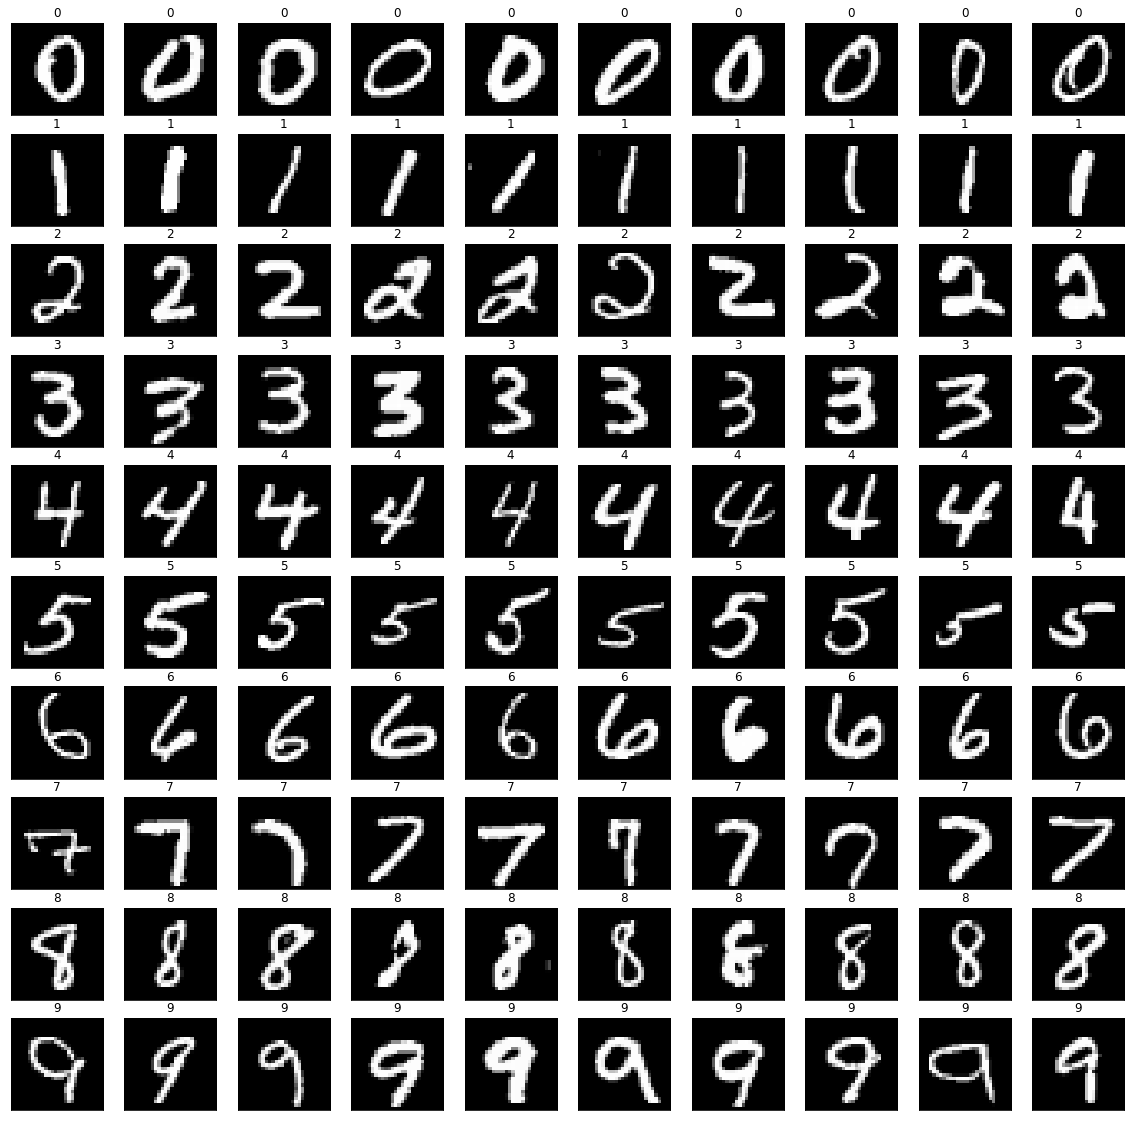

In [4]:
def Q1(num_examples=10):
    ### STUDENT START ###

    # loop to get array of arrays, 10 image, label pairs of each digit 0-9
    # first loop just goes through digits 0-9
    # second loop to iterate through img and digit label arrays
    digits=[]
    for k in range(10):
        digit=[]
        for i,j in zip(X,Y):
            # append img array and label to digit list if k matches
            if j==str(k):
                digit.append((i,j))
                if len(digit) == num_examples:
                    break
        digits.append(digit)

    # nested loops to iterate through digits arrays and plot onto subplots figure
    # reference: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
    plt.rcParams['figure.figsize'] = [num_examples*2, num_examples*2]
    fig, axs = plt.subplots(10, num_examples)
    for i in range(10):
        for j in range(num_examples):
            pixels = digits[i][j][0].reshape((28,28))
            label = digits[i][j][1]
            axs[i,j].imshow(pixels, cmap='gray')
            axs[i,j].set_title(label)
            # hide axis
            axs[i,j].axes.get_xaxis().set_visible(False)
            axs[i,j].axes.get_yaxis().set_visible(False)

    ### STUDENT END ###

Q1(10)

### Question 2: Evaluating different choices of k
---

1. Produce k-Nearest Neighbors models with k = 1, 3, 5, 7, and 9.  
1. Print the accuracy of each model. 
1. Additionally, only for the 1-Nearest Neighbor model, show the precision, recall, and F1 for each label. 
1. Which digit is the most *difficult* for the 1-Nearest Neighbor model to classify correctly? How did you choose and why?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Print only the information asked so it is easy to read and compare.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.
* Check out what the function "score" does.

In [5]:
def Q2(k_values):
    ### STUDENT START ###
    
    accuracy = []
    for k in k_values:
        knn = KNeighborsClassifier(k)
        print('k-Nearest Neighbors models with k =',k)
        print('    Accuracy:',knn.fit(mini_train_data, mini_train_labels).score(dev_data, dev_labels))
        print()
        
        if k == 1:
            print(classification_report(dev_labels,knn.predict(dev_data)))
    
    ### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
Q2(k_values)

k-Nearest Neighbors models with k = 1
    Accuracy: 0.884

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

k-Nearest Neighbors models with k = 3
    Accuracy: 0.876

k-Nearest Neighbors models with k = 5
    Accuracy: 0.882

k-Nearest Neighbors models with k = 7
    Accuracy: 0.877

k-Nea

Answer to part 4: 8

The F-measure can be interpreted as a weighted harmonic mean of the precision and recall, both of which are important in determining the difficulty our model has in classification.

From https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-and-f-measures


### Question 3: Examining the importance of training size
---
1. Produce 1-Nearest Neighbor models using training data of various sizes. For example, ```train_data[:train_size]```.
1. Evaluate and show the accuracy achieved by each model.  
1. Show the time needed to: 
  1. Train each model.
  1. Measure the accuracy of each model.
1. What do you see? Is this what you expected to see and why?
1. Plot on the same graph (as a function of training size):
  1. the time needed for training
  1. the time needed for calculating accuracy

Notes:
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

1-Nearest Neighbor model

Training data size: 100
    Accuracy: 0.702
    Train Time: 0.002557039260864258
    Evaluation Time: 0.13477182388305664

Training data size: 200
    Accuracy: 0.791
    Train Time: 0.0021800994873046875
    Evaluation Time: 0.20868611335754395

Training data size: 400
    Accuracy: 0.811
    Train Time: 0.0053369998931884766
    Evaluation Time: 0.44272589683532715

Training data size: 800
    Accuracy: 0.866
    Train Time: 0.016171932220458984
    Evaluation Time: 0.8229990005493164

Training data size: 1600
    Accuracy: 0.905
    Train Time: 0.03588581085205078
    Evaluation Time: 1.875791311264038

Training data size: 3200
    Accuracy: 0.927
    Train Time: 0.15954089164733887
    Evaluation Time: 3.762676954269409

Training data size: 6400
    Accuracy: 0.939
    Train Time: 0.33170294761657715
    Evaluation Time: 7.341369152069092

Training data size: 12800
    Accuracy: 0.952
    Train Time: 1.1177568435668945
    Evaluation Time: 13.6221811771392

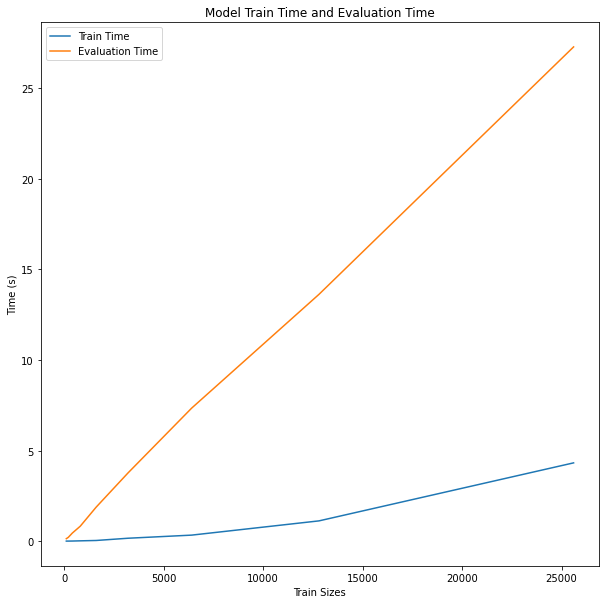

In [9]:
def Q3(train_sizes, accuracies, train_times, eval_times):

### STUDENT START ###
    knn = KNeighborsClassifier(1)
    for train_size in train_sizes:
        
        # fit knn and use time method to measure duration
        start = time.time()
        fitted = knn.fit(train_data[:train_size], train_labels[:train_size])
        train_time = time.time() - start
        
        # eval knn and use time method to measure duration
        start = time.time()
        accuracy = fitted.score(dev_data, dev_labels)
        eval_time = time.time() - start
        
        accuracies.append(accuracy)
        train_times.append(train_time)
        eval_times.append(eval_time)
    
    # for loop though all the zipped model characteristics
    print('1-Nearest Neighbor model\n')
    for i,j,k,l in zip(train_sizes,accuracies,train_times,eval_times):
        print('Training data size:',i)
        print('   ','Accuracy:',j)
        print('   ','Train Time:',k)
        print('   ','Evaluation Time:',l)
        print()
        
    print('We see the accuracy improving as the training data increases.')
    print('This is what we would expect as typically the model improves with more data available for training')
    print('We see below the Train Time is short relative to the Evaluation Time.')
    print('Initially this is unexpected however, the KNN algorithm is a "lazy learner" and performs all computation at time of prediction.')
    print('Knowing this we would expect the results below.')
    
    # plot durations and show with legend
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.plot(train_sizes,train_times,label='Train Time')
    plt.plot(train_sizes,eval_times,label='Evaluation Time')
    plt.title('Model Train Time and Evaluation Time')
    plt.xlabel('Train Sizes')
    plt.ylabel('Time (s)')
    plt.legend()
    plt.show()
        
    
    
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
train_times = []
eval_times = []
Q3(train_sizes, accuracies, train_times, eval_times)

### Question 4: Evaluating if we should obtain additional data
---

In this question we wish to predict what accuracy we would get if we had additional training data.

Our input, our features and labels, are the output from the previous question. Based on the training size and accuracy we got in the previous question, we wish to predict the accuracy we would get if we had larger training sizes.

1. Produce a linear regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. 
1. Print $R^2$ of the linear regression model.  
1. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000.  
1. Plot on a lineplot graph:
  1. the actual accuracies we obtained in the previous question 
  1. and the accuracies our model predicted we would have gotten.
  1. The X axis is the training set size. 
  1. You can limit the range of X and Y to the range where you have data for both plots. Meaning, in the this question, we want to visualize how good the prediction is.
1. What are two things that are wrong with our model?
1. Apply a transformation to the predictor features and a transformation to the outcome that make the predictions fix these issues. 
1. Show $R^2$ of the improved linear regression model.  
1. Print the accuracies predicted for training set sizes 60000, 120000, and 1000000.  
1. Plot a lineplot graph of both again as before.
  1. Be sure to plot this where the Y axis is accuracy and X axis is training set size, **not the transformed space**!
  1. Choose the range of X and Y to visualize effectively.

Notes:
* Train the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the linear regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.
* Hints:
  1. You have two problems here, how well your model fits and predicting *illogical* values of accuracy.
  1. You can look at:
    1. [logit](https://en.wikipedia.org/wiki/Logit): $\frac{1}{1 + e^{-x}} = \frac{e^x}{1+e^x}$ which takes numbers in $\[\infty,-\infty\]$ and outputs numbers in $(0, 1)$.
    1. [logistic](https://en.wikipedia.org/wiki/Logistic_function): $log(\frac{p}{1 - p})$ which takes numbers between $(0, 1)$ and outputs numbers between $\[\infty,-\infty\]$.
    1. It also happens that $x = logistic(p)$ is the same thing as $logit(x)=p$.

R-squared: 0.4177006634161019
Predicted Accuracy of 1.2361731707874237 for training size of 60000
Predicted Accuracy of 1.637428053637104 for training size of 120000
Predicted Accuracy of 7.522499668765751 for training size of 1000000


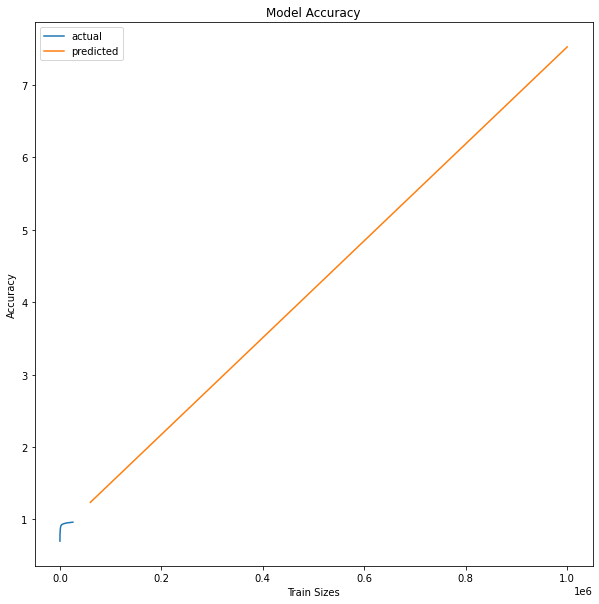

Things wrong with our model:
    1. Accuracy can never be above 1, thus our model must bound our accuracy between 0 and 1.
    2. Our data is not well described by a simple linear model. A logrithmic model might better fit the data.

Tranformed Regression Model
R-squared: 0.8579468482887074
Training set size: 60000 Accuracy 0.7748971968855034
Training set size: 120000 Accuracy 0.8371846683676061
Training set size: 1000000 Accuracy 0.999459513177672


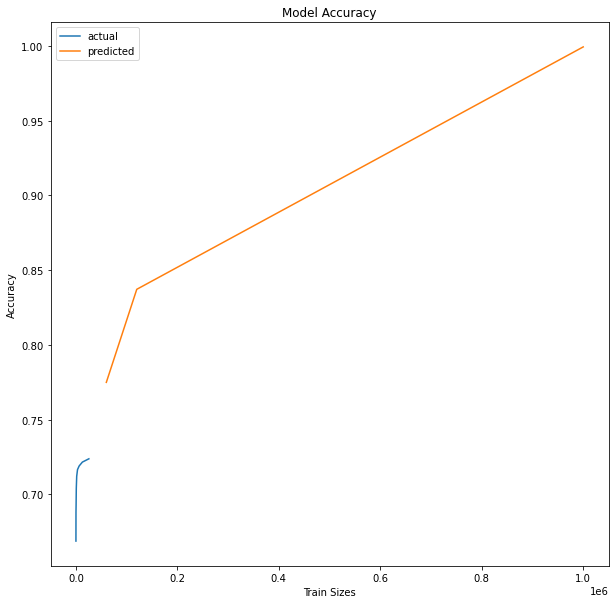

In [10]:
def Q4():

### STUDENT START ###

    # reshape arrays for regression
    train_sizes_rs=np.array(train_sizes).reshape(-1, 1)
    accuracies_rs=np.array(accuracies).reshape(-1, 1)
    predicted_sizes_rs = np.array([60000, 120000, 1000000]).reshape(-1,1)

    # fit my regression
    reg = LinearRegression().fit(train_sizes_rs, accuracies_rs)

    # print my model characteristics
    print('R-squared:',reg.score(train_sizes_rs, accuracies_rs))
    for training_size,predicted_accuracy in zip(predicted_sizes_rs, reg.predict(predicted_sizes_rs)):
        print('Predicted Accuracy of',predicted_accuracy[0],'for training size of',training_size[0])

    # plot my sizes and accuracies
    plt.plot(train_sizes_rs,accuracies_rs,label='actual')
    plt.plot(predicted_sizes_rs,reg.predict(predicted_sizes_rs),label='predicted')
    plt.title('Model Accuracy')
    plt.xlabel('Train Sizes')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    print('Things wrong with our model:')
    print('   ', '1. Accuracy can never be above 1, thus our model must bound our accuracy between 0 and 1.')
    print('   ', '2. Our data is not well described by a simple linear model. A logrithmic model might better fit the data.')
    print()

    # transform my data to have sensible accuracies and a more accurate linear regression
    train_sizes_rs_t = train_sizes_rs
    accuracies_rs_t = logit(accuracies_rs)

    predicted_sizes_rs_t = predicted_sizes_rs
    predicted_sizes_accuracies_rs_t = logit(reg.predict(predicted_sizes_rs))

    total_sizes_t = np.append(train_sizes_rs_t, predicted_sizes_rs_t).reshape(-1,1)
    total_accuracies_t = np.append(accuracies_rs_t, predicted_sizes_accuracies_rs_t).reshape(-1,1)

    # perform linear regression on transformed data
    reg = LinearRegression().fit(total_sizes_t, total_accuracies_t)

    # again zip printing model characteristics
    print('Tranformed Regression Model')
    print('R-squared:',reg.score(total_sizes_t, total_accuracies_t))
    for i,j in zip(predicted_sizes_rs_t,predicted_sizes_accuracies_rs_t):
        print('Training set size:',i[0],'Accuracy',j[0])

    # again plotting my sizes and accuracies
    plt.plot(train_sizes_rs_t,accuracies_rs_t,label='actual')
    plt.plot(predicted_sizes_rs_t, predicted_sizes_accuracies_rs_t,label='predicted')
    plt.title('Model Accuracy')
    plt.xlabel('Train Sizes')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

def logistic(p):
    return np.log(p)- np.log(1 - p)
def logit(p):
    return 1 / (1 + np.exp(-p))

### STUDENT END ###

Q4()

Answer to part 5:  

Things wrong with the model:

    1. Accuracy can never be above 1, thus our model must bound our accuracy between 0 and 1.
    2. Our data is not well described by a simple linear model. A logrithmic model might better fit the data.

### Question 5: Getting to know the confusion matrix.
---

1. Produce a 1-Nearest Neighbor model.
1. Show the confusion matrix. 
1. Which digit does the model most often confuse with which digit? (*for example, the model most often mistakes the digit $1$ as the digit $7$*).
1. Show examples of the misclassified digit.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.
- No need to calculate the "most confused digits" programmatically.

In [8]:
def Q5():

### STUDENT START ###

    # creating my knn
    knn = KNeighborsClassifier(1)
    
    # fitting my knn
    fitted = knn.fit(mini_train_data, mini_train_labels)
    
    # evaluating my knn
    accuracy = fitted.score(dev_data, dev_labels)
    
    # printing all the model characteristics
    print('1-Nearest Neighbor model')
    print()
    print('   ','Accuracy:',accuracy)
    print()
    print(classification_report(dev_labels,knn.predict(dev_data)))
    print()
    print('Confusion Matrix:')
    print()
    print(confusion_matrix(dev_labels,knn.predict(dev_data)))


### STUDENT END ###

Q5()


1-Nearest Neighbor model

    Accuracy: 0.884

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000


Confusion Matrix:

[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [

Answer to part 3: The model often mistakes the digit 4 as the digit 9. 
